In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\thris\\Desktop\\colorado_motor_vehicle_sales.csv")
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


In [3]:
df.shape

(501, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [5]:
df["year"].value_counts()

year
2010    64
2011    64
2012    64
2013    64
2014    64
2015    64
2009    61
2008    56
Name: count, dtype: int64

In [6]:
df["county"].value_counts()

county
Adams                 32
Arapahoe              32
Weld                  32
Pueblo                32
Mesa                  32
Larimer               32
La Plata              32
Jefferson             32
Garfield              32
Fremont               32
El Paso               32
Douglas               32
Denver                32
Boulder               28
Broomfield            28
Rest of State         25
Boulder/Broomfield     4
Name: count, dtype: int64

In [7]:
df["quarter"].value_counts()

quarter
4    126
1    125
2    125
3    125
Name: count, dtype: int64

<Axes: xlabel='sales', ylabel='Density'>

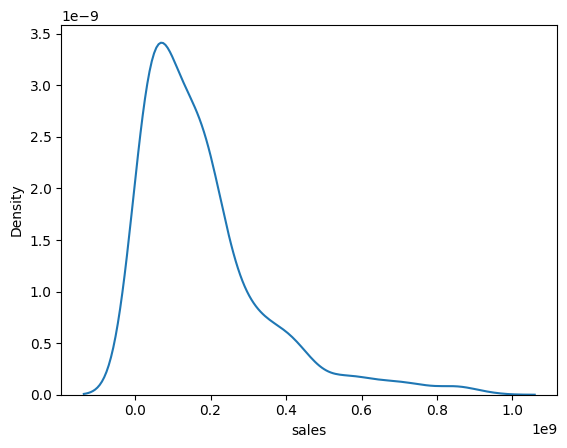

In [9]:
sns.kdeplot(x="sales",data=df)

In [10]:
df["sales"].describe()

count    5.010000e+02
mean     1.760585e+08
std      1.642055e+08
min      6.274000e+06
25%      6.148200e+07
50%      1.385820e+08
75%      2.241580e+08
max      9.169100e+08
Name: sales, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

df["sales"]=mm.fit_transform(df[["sales"]])

In [14]:
df["sales"].describe()

count    501.000000
mean       0.186446
std        0.180320
min        0.000000
25%        0.060626
50%        0.145292
75%        0.239266
max        1.000000
Name: sales, dtype: float64

<Axes: xlabel='sales', ylabel='Count'>

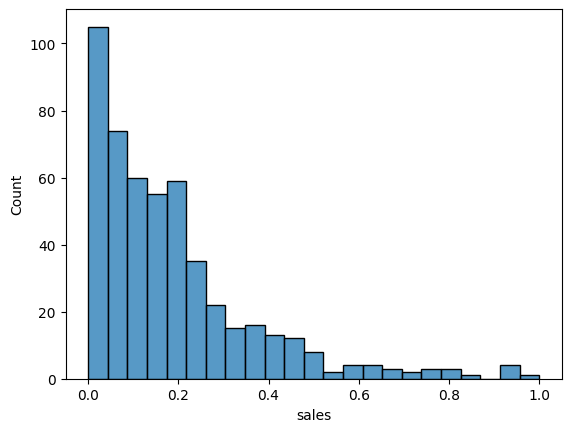

In [15]:
sns.histplot(x="sales",data=df)

In [17]:
a=df.groupby("quarter")["sales"].mean()

In [32]:
a

quarter
1    0.172122
2    0.189398
3    0.203205
4    0.181102
Name: sales, dtype: float64

Text(0.5, 1.0, 'Average Sales for each quarter')

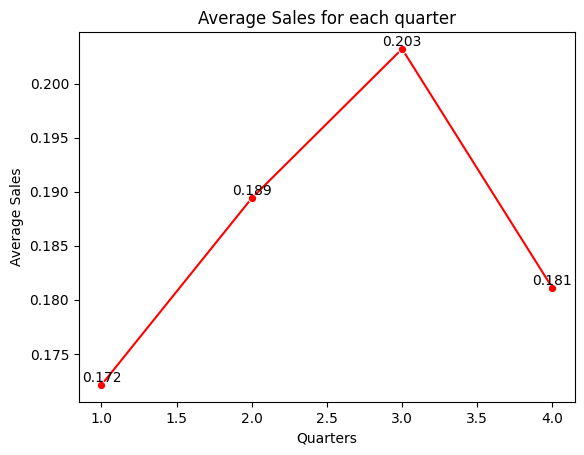

In [36]:
sns.lineplot(x=a.index,y=a.values,marker="o",color="red")

for i , v in enumerate(a.values):
    plt.text(a.index[i], v, f"{v:.3f}", ha="center", va="bottom", fontsize=10)

plt.xlabel("Quarters")
plt.ylabel("Average Sales")
plt.title("Average Sales for each quarter")

In [40]:
b=df.groupby("county")["sales"].mean().head()
b


county
Adams                 0.298601
Arapahoe              0.684328
Boulder               0.179108
Boulder/Broomfield    0.179025
Broomfield            0.033401
Name: sales, dtype: float64

Text(0.5, 1.0, 'Top 5 countires with high sales')

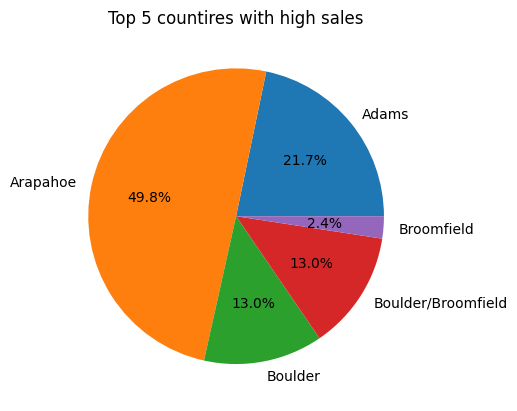

In [63]:
labels=["Adams","Arapahoe","Boulder","Boulder/Broomfield","Broomfield"]
plt.pie(b.values, labels=labels, autopct='%1.1f%%')
plt.title("Top 5 countires with high sales")

In [49]:
df.groupby("county")["sales"].mean().sort_values(ascending=False)

county
Arapahoe              0.684328
El Paso               0.402372
Jefferson             0.303965
Adams                 0.298601
Denver                0.225215
Boulder               0.179108
Boulder/Broomfield    0.179025
Larimer               0.176511
Weld                  0.167675
Rest of State         0.150458
Douglas               0.104176
Mesa                  0.083069
Pueblo                0.074923
Garfield              0.048037
Broomfield            0.033401
La Plata              0.020317
Fremont               0.003987
Name: sales, dtype: float64

In [50]:
c=df.groupby("year")["sales"].mean()

<Axes: xlabel='year'>

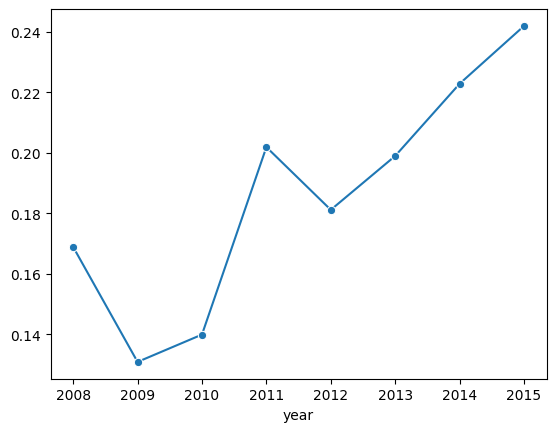

In [53]:
sns.lineplot(x=c.index,y=c.values,marker="o")

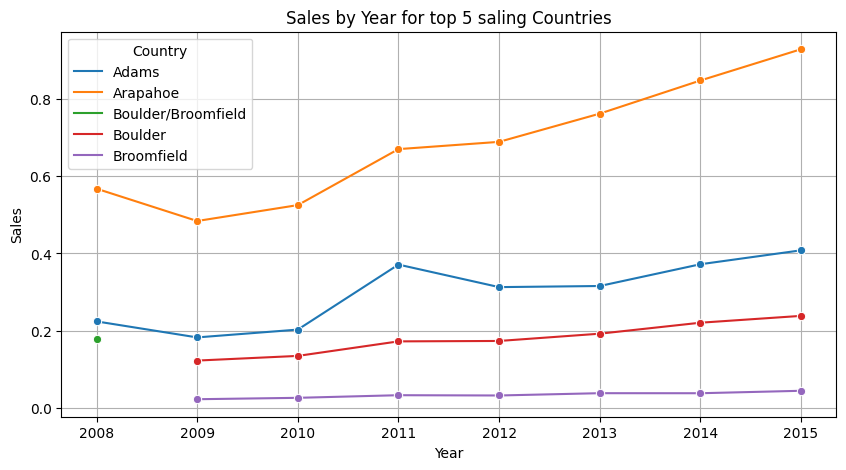

In [62]:
countries_to_visualize = ["Adams","Arapahoe","Boulder","Boulder/Broomfield","Broomfield"]
d = df[df['county'].isin(countries_to_visualize)]

# Group by year and country, calculate the mean sales
grouped_df = d.groupby(['year', 'county'])['sales'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_df, x='year', y='sales', hue='county', marker='o')

# Add title and labels
plt.title('Sales by Year for top 5 saling Countries')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Country')
plt.grid(True)

# Display the plot
plt.show()